In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def cross_validation(complete_data, cur_features, feat_to_add):
    """
    This function performs cross-validation on the given data to determine the accuracy of a particular subset of features.
    It returns the accuracy as a decimal value between 0 and 1.

    Args:
        complete_data: The complete dataset to be used for cross-validation, including all features and labels.
        cur_features: The subset of features to be considered for cross-validation.
        feat_to_add: The additional feature to be considered for cross-validation (if any).

    Returns:
        The accuracy of the given subset of features as a decimal value between 0 and 1.
    """

    # Use NumPy's copy() function to deep copy the complete_data array
    data = np.copy(complete_data)

    # Set all features not in cur_features or feat_to_add to 0
    for i in range(1, complete_data.shape[1]):
        if i not in cur_features and i != feat_to_add:
            data[:, i] = 0

    num_correct = 0
    num_rows = data.shape[0]

    # Iterate through each row in the dataset
    for i in range(num_rows):
        objs_to_classify = data[i, 1:]
        label = data[i, 0]

        # Set initial values for nearest neighbor
        nn_dist = nn_loc = 10000.0
        nn_lbl = 0.0

        # Iterate through each row in the dataset again to find the nearest neighbor
        for j in range(num_rows):
            if i != j:
                dist = np.sqrt(sum(pow(objs_to_classify - data[j, 1:], 2)))
                if dist <= nn_dist:
                    nn_dist = dist
                    nn_loc = j
                    nl_lbl = data[nn_loc, 0]

        # Check if the nearest neighbor is the correct label
        if label == nl_lbl:
            num_correct += 1

    # Calculate the accuracy
    accuracy = num_correct / num_rows
    return accuracy


In [ ]:
def backward_elimination(data):
    # set of features selected
    current_features = set(range(1, data.shape[1]))

    # dictionary to track subsets of feature performances
    feature_performances = {}
    # stores accuracies at each iteration
    accuracies = set()
    # stores the accuracy with all features
    overall_accuracy = 0

    num_cols = data.shape[1]
    # iterate through each level
    for i in range(num_cols - 1):
        # store feature to add and best accuracy so far
        feature_to_remove = None
        best_accuracy = 0

        print('Evaluating level {} of the search tree'.format(i + 1))
        # iterate through each feature
        for j in range(num_cols - 1):
            if j + 1 in current_features:
                print('\tConsidering removing feature {}'.format(j + 1))

                # create a copy of the current features and remove the feature being considered
                sub_features = current_features.copy()
                sub_features.remove(j + 1)
                accuracy = cross_validation(data, sub_features, 0)

                if i == 0 and j == 0:
                    overall_accuracy = accuracy

                # update best accuracy if improvement exists
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    print('Updated accuracy:', best_accuracy)
                    feature_to_remove = j + 1

                # keeps track of accuracies
                accuracies.add(best_accuracy)

        # remove the feature that was selected to be removed
        current_features.remove(feature_to_remove)

        # keep track of feature sets and corresponding accuracies
        if round(best_accuracy, 3) not in feature_performances.keys():
            feature_performances[round(best_accuracy, 3)] = current_features.copy()

        print('Feature {} removed on level {}\n'.format(feature_to_remove, i + 1))

    print('Best features: ', feature_performances[round(max(accuracies), 3)])
    print('Best accuracy: ', round(max(accuracies), 3))
    print('Accuracy with all features:', overall_accuracy)

    return accuracies, feature_performances

In [ ]:
def forward_selection(data):
    # set of features selected
    current_features = set()

    # dictionary to track subsets of feature performances
    feature_performances = {}
    accuracies = set()

    num_cols = data.shape[1]
    # iterate through each level
    for i in range(num_cols - 1):
        # store feature to add and best accuracy so far
        feature_to_add = None
        best_accuracy = 0

        print('Evaluating level {} of the search tree'.format(i + 1))
        # iterate through each feature
        for j in range(num_cols - 1):
            if j + 1 not in current_features:
                print('\tConsidering adding feature {}'.format(j + 1))
                accuracy = cross_validation(data, current_features, j + 1)

                # update best accuracy if improvement exists
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    print('Updated accuracy:', best_accuracy)
                    feature_to_add = j + 1

                # keeps track of accuracies
                accuracies.add(round(best_accuracy, 3))

        # add the feature that was selected to be added
        current_features.add(feature_to_add)
        # keep track of feature sets and corresponding accuracies
        if round(best_accuracy, 3) not in feature_performances.keys():
            feature_performances[round(best_accuracy, 3)] = current_features.copy()
        print('Feature {} added on level {}\n'.format(feature_to_add, i + 1))

    print('Best features: ', feature_performances[max(accuracies)])
    print('Best accuracy: ', max(accuracies))
    print('Accuracy with all features:', best_accuracy)

    return accuracies, feature_performances

In [ ]:
def main():
    # Prompt the user to input the dataset they want to use
    dataset = input("Please enter the dataset you want to use: ")

    # Pass the dataset to a pandas DataFrame
    data = pd.read_csv(dataset, header=None, sep=r"\s+")

    # Prompt the user to input either 1 or 2
    user_input = int(input("1. Forward Selection\n2. Backward Elimination\nEnter 1 or 2: "))

    
    
    # If the user selects 1, call the forward_selection() function
    if user_input == 1:
        
        accuracies, features = forward_selection(data)
    # If the user selects 2, call the backward_elimination() function
    else:
         accuracies, features = backward_elimination(data)
    return features, accuracies

In [ ]:
dataset='CS170_Small_Data__80.txt' 
data = pd.read_csv(dataset, header=None, sep=r"\s+")

In [ ]:
accuracies, feature_performances = forward_selection(data)

accuracy_list = list(accuracies)
feature_set_list = []
for key, value in feature_performances.items():
  for i in range(len(accuracy_list)):
    feature_set_list.append(list(set(value)))

Evaluating level 1 of the search tree
	Considering adding feature 1
Updated accuracy: 0.726
	Considering adding feature 2
	Considering adding feature 3
Updated accuracy: 0.834
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Feature 3 added on level 1

Evaluating level 2 of the search tree
	Considering adding feature 1
Updated accuracy: 0.87
	Considering adding feature 2
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Updated accuracy: 0.956
Feature 6 added on level 2

Evaluating level 3 of the search tree
	Considering adding feature 1
Updated accuracy: 0.922
	Considering adding feature 2
Updated accuracy: 0.928
	Considering adding feature 4
	Considering adding feature 5
Updated accuracy: 0.938
Feature 5 added on level 3

Evaluating level 4 of the search tree
	Considering adding feature 1
Updated accuracy: 0.898
	Considering adding feature 2
	Considering adding feature 4
Feature 1 added on level 4

Evalu

In [ ]:
accuracy_list

[0.726, 0.834, 0.87, 0.922, 0.956, 0.928, 0.938, 0.898, 0.838, 0.864, 0.804]

In [ ]:
feature_set_list

[[3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6],
 [1, 2, 3, 4, 5, 6]]

In [ ]:
feature_set=['{3}','{3,6}','{3,5,6}','{1,3,4,5,6}','{1,2,3,4,5,6}']

In [ ]:
import plotly.express as px

# define the data for the bar graph
data = {
    'accuracy': accuracy_list,
    'feature_set': feature_set
}

# create the bar graph
fig = px.bar(data, x='feature_set', y='accuracy',
             title='Accuracy of Feature Subsets')
fig.show()


ValueError: ignored

In [ ]:
import numpy as np

# calculate the difference in size between the arrays
size_diff = len(feature_set) - len(accuracy_list)

# add empty values to the accuracy_list array
accuracy_list = np.append(accuracy_list, [None] * size_diff)


In [ ]:
len(feature_set)

5

ValueError: ignored

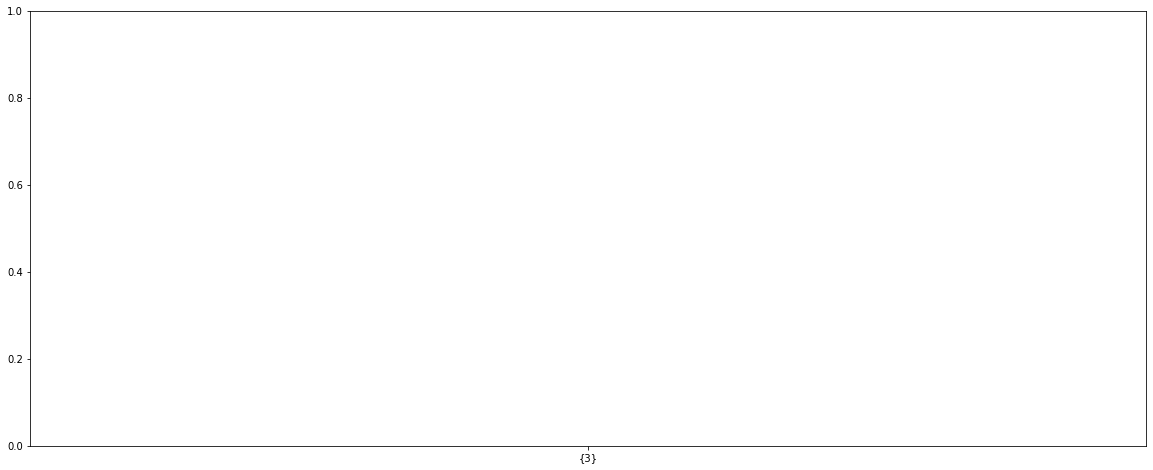

In [ ]:
# Import the required library
import matplotlib.pyplot as plt

# Create the x-axis tick labels
x = ['{' + ', '.join(map(str, fs)) + '}' for fs in feature_set_list]

# Create the y-axis values
y = accuracy_list

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart
ax.bar(x, y, tick_label=x)

# Set the x-axis and y-axis labels
ax.set_xlabel('Current Feature Set')
ax.set_ylabel('Accuracy')

# Set the title for the plot
ax.set_title('Feature Selection: Small Dataset')

# Save the plot
plt.savefig('graphs/my_graph.png')


In [ ]:
def graph_feature_selection():
    #file_name = input('Enter a file name to use for the graph image: ')

    features, accuracies = main()
    x = [str(val) for val in features.values()]
    y = [float(key) for key in features.keys()]

    fig, ax = plt.subplots(figsize=(20, 8))
    ax.bar(x, y, tick_label=x)
    ax.set_xlabel('Current Feature Set')
    ax.set_ylabel('Accuracy')
    ax.set_title('Feature Selection')
    #plt.savefig('graphs/{}.png'.format(file_name))

Please enter the dataset you want to use: CS170_Small_Data__80.txt
1. Forward Selection
2. Backward Elimination
Enter 1 or 2: 1
Evaluating level 1 of the search tree
	Considering adding feature 1
Updated accuracy: 0.726
	Considering adding feature 2
	Considering adding feature 3
Updated accuracy: 0.834
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Feature 3 added on level 1

Evaluating level 2 of the search tree
	Considering adding feature 1
Updated accuracy: 0.87
	Considering adding feature 2
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Updated accuracy: 0.956
Feature 6 added on level 2

Evaluating level 3 of the search tree
	Considering adding feature 1
Updated accuracy: 0.922
	Considering adding feature 2
Updated accuracy: 0.928
	Considering adding feature 4
	Considering adding feature 5
Updated accuracy: 0.938
Feature 5 added on level 3

Evaluating level 4 of the search tree
	Considering adding

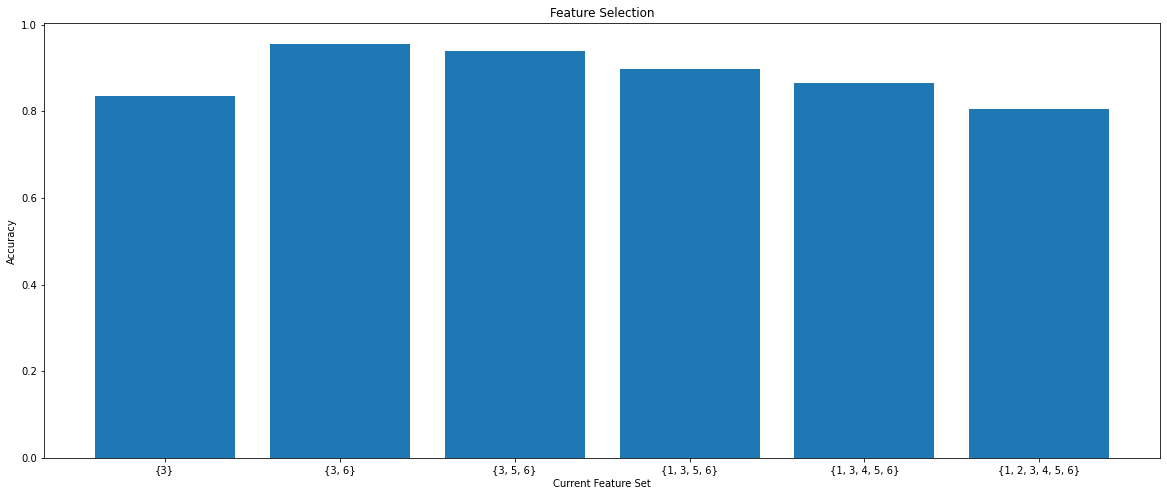

In [ ]:
graph_feature_selection()

In [ ]:
import plotly.express as px
def graph_feature_selection():
  features, accuracies = main()
  x = [str(val) for val in features.values()]
  y = [float(key) for key in features.keys()]

  # Create the figure
  fig = px.bar(x=x, y=y, title='Feature Selection')
  fig.update_layout(xaxis_title='Current Feature Set', yaxis_title='Accuracy')

  # Show the figure
  fig.show()

In [ ]:
graph_feature_selection()

Please enter the dataset you want to use: CS170_Small_Data__80.txt
1. Forward Selection
2. Backward Elimination
Enter 1 or 2: 1
Evaluating level 1 of the search tree
	Considering adding feature 1
Updated accuracy: 0.726
	Considering adding feature 2
	Considering adding feature 3
Updated accuracy: 0.834
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Feature 3 added on level 1

Evaluating level 2 of the search tree
	Considering adding feature 1
Updated accuracy: 0.87
	Considering adding feature 2
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
Updated accuracy: 0.956
Feature 6 added on level 2

Evaluating level 3 of the search tree
	Considering adding feature 1
Updated accuracy: 0.922
	Considering adding feature 2
Updated accuracy: 0.928
	Considering adding feature 4
	Considering adding feature 5
Updated accuracy: 0.938
Feature 5 added on level 3

Evaluating level 4 of the search tree
	Considering adding

In [ ]:
graph_feature_selection()


Please enter the dataset you want to use: CS170_Small_Data__80.txt
1. Forward Selection
2. Backward Elimination
Enter 1 or 2: 2
Evaluating level 1 of the search tree
	Considering removing feature 1
Updated accuracy: 0.86
	Considering removing feature 2
Updated accuracy: 0.864
	Considering removing feature 3
	Considering removing feature 4
	Considering removing feature 5
	Considering removing feature 6
Feature 2 removed on level 1

Evaluating level 2 of the search tree
	Considering removing feature 1
Updated accuracy: 0.876
	Considering removing feature 3
	Considering removing feature 4
Updated accuracy: 0.898
	Considering removing feature 5
	Considering removing feature 6
Feature 4 removed on level 2

Evaluating level 3 of the search tree
	Considering removing feature 1
Updated accuracy: 0.938
	Considering removing feature 3
	Considering removing feature 5
	Considering removing feature 6
Feature 1 removed on level 3

Evaluating level 4 of the search tree
	Considering removing feature 3

In [ ]:
graph_feature_selection()


Evaluating level 1 of the search tree
	Considering adding feature 1
Updated accuracy: 0.68
	Considering adding feature 2
Updated accuracy: 0.699
	Considering adding feature 3
Updated accuracy: 0.846
	Considering adding feature 4
	Considering adding feature 5
	Considering adding feature 6
	Considering adding feature 7
	Considering adding feature 8
	Considering adding feature 9
	Considering adding feature 10
	Considering adding feature 11
	Considering adding feature 12
	Considering adding feature 13
	Considering adding feature 14
	Considering adding feature 15
	Considering adding feature 16
	Considering adding feature 17
	Considering adding feature 18
	Considering adding feature 19
	Considering adding feature 20
	Considering adding feature 21
	Considering adding feature 22
	Considering adding feature 23
	Considering adding feature 24
	Considering adding feature 25
	Considering adding feature 26
	Considering adding feature 27
	Considering adding feature 28
	Considering adding feature 29
	

In [ ]:
graph_feature_selection()


Evaluating level 1 of the search tree
	Considering removing feature 1
Updated accuracy: 0.69
	Considering removing feature 2
Updated accuracy: 0.7
	Considering removing feature 3
	Considering removing feature 4
	Considering removing feature 5
	Considering removing feature 6
Updated accuracy: 0.705
	Considering removing feature 7
	Considering removing feature 8
	Considering removing feature 9
	Considering removing feature 10
	Considering removing feature 11
Updated accuracy: 0.708
	Considering removing feature 12
	Considering removing feature 13
	Considering removing feature 14
	Considering removing feature 15
	Considering removing feature 16
	Considering removing feature 17
	Considering removing feature 18
	Considering removing feature 19
	Considering removing feature 20
	Considering removing feature 21
	Considering removing feature 22
	Considering removing feature 23
	Considering removing feature 24
	Considering removing feature 25
	Considering removing feature 26
	Considering removin